.. _nb_callback:

## Callback

A `Callback` class can be used to receive a notification of the algorithm object each generation.
This can be useful to keep track of metrics, do additional calculations or even modify the algorithm object during the run.
The latter is only recommend for experienced users.

For instance, to keep track of the best solution each generation:

n_gen |  n_eval |     favg     |     fopt    
    1 |     100 |  0.831497479 |  0.387099336
    2 |     200 |  0.578035582 |  0.302189349
    3 |     300 |  0.443801185 |  0.267733594
    4 |     400 |  0.347200983 |  0.188215259
    5 |     500 |  0.273664893 |  0.083479177
    6 |     600 |  0.209684189 |  0.083479177
    7 |     700 |  0.163212925 |  0.061742077
    8 |     800 |  0.131781365 |  0.061742077
    9 |     900 |  0.109464069 |  0.056507630
   10 |    1000 |  0.088395812 |  0.034919676
   11 |    1100 |  0.075085308 |  0.034919676
   12 |    1200 |  0.063297528 |  0.015827453
   13 |    1300 |  0.052520701 |  0.015827453
   14 |    1400 |  0.040458171 |  0.010474596
   15 |    1500 |  0.032093831 |  0.010474596
   16 |    1600 |  0.025902907 |  0.006447949
   17 |    1700 |  0.019104630 |  0.004402193
   18 |    1800 |  0.014938798 |  0.004402193
   19 |    1900 |  0.011800547 |  0.004402193
   20 |    2000 |  0.009698541 |  0.004148124


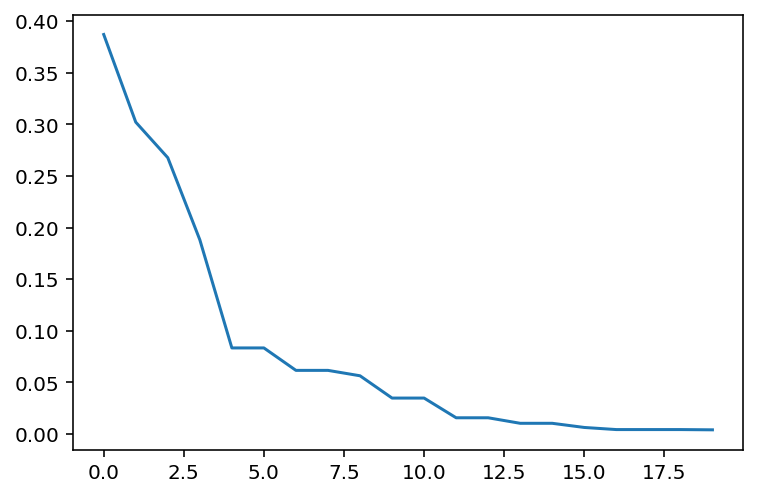

In [6]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.model.callback import Callback
from pymoo.optimize import minimize

import numpy as np

import matplotlib.pyplot as plt


class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())


problem = get_problem("sphere")

algorithm = GA(pop_size=100, callback=MyCallback())

res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               save_history=True,
               verbose=True)

val = res.algorithm.callback.data["best"]
plt.plot(np.arange(len(val)), val)
plt.show()


If the analysis of the run should be done during post-processing the option `save_history` can be used as well. If a callback is used the history does not need to be saved.
By using the history object the same as above can be achieved by using the stored information during the run:

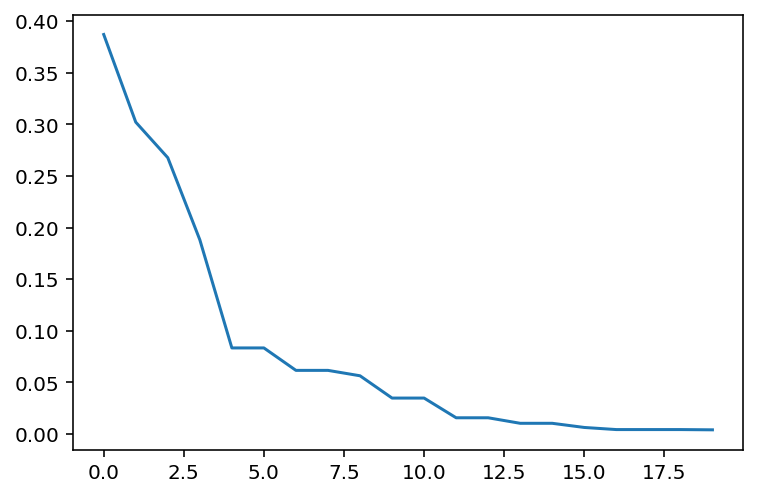

In [7]:
val = [e.pop.get("F").min() for e in res.history]
plt.plot(np.arange(len(val)), val)
plt.show()

If the `save_history` is true a deep copy of the algorithm object takes place each generation. Please note that this can be quite expensive and might not be desired for all runs. However, it provides great post-processing options because all data can be accessed respectively.